In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
import os
path = r'C:\Python\Ykill\DataScinese\data'
os.chdir(path)

In [240]:
df = pd.read_excel('default of credit card clients.xls', skiprows=1)
df = df.drop(columns='ID')

In [241]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

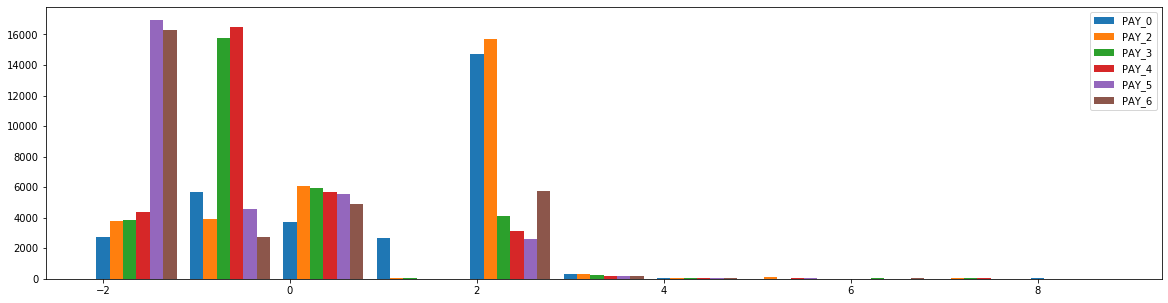

In [242]:
ll = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
dd = 0
fig = plt.figure(figsize=(20,5))
for i in ll:
    plt.bar((pd.unique(df[i])) + dd, df[i].value_counts(), width = 1/7);
    dd += 1/7
plt.legend(ll)
plt.show()

In [243]:
# подозрение на сдвиг данных по шкале PAY_
df_move = df.copy()
for j in [0, -1, -2]:
    m = j + 1
    for i in ll:
        df_move.loc[df_move[i] == j, i] = m

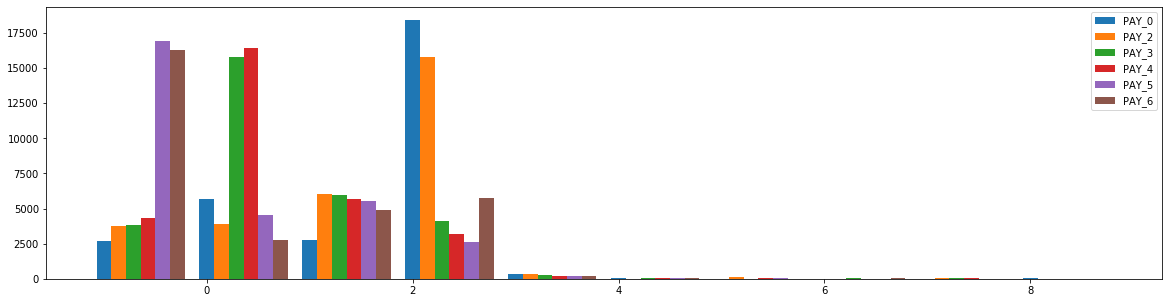

In [244]:
ll = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
dd = 0
fig = plt.figure(figsize=(20,5))
for i in ll:
    plt.bar((pd.unique(df_move[i])) + dd, df_move[i].value_counts(), width = 1/7);
    dd += 1/7
plt.legend(ll)
plt.show()

In [ ]:
# совпадает ли погашение кридита с дефолтным состоянием?
cond = (df_move.PAY_AMT1+df_move.PAY_AMT2+df_move.PAY_AMT3+
        df_move.PAY_AMT4+df_move.PAY_AMT5+df_move.PAY_AMT6)
res = np.where(df_move.LIMIT_BAL >= cond, 0, 1)

pd.Series(res).eq(df_move['default payment next month']).value_counts()

In [ ]:
# что с вариантом, когда баланс отрицательны но нет дефолта?
res2 = np.where(((pd.Series(res) == 1) & (df_move['default payment next month'] == 0)), True, False)
pd.Series(res2).value_counts()

In [422]:
# проверка медианы и среднего
df_move.describe().T[['mean', '50%']]

,mean,50%
LIMIT_BAL,167484.322667,140000.0
SEX,1.603733,2.0
EDUCATION,1.853133,2.0
MARRIAGE,1.551867,2.0
AGE,35.485500,34.0
PAY_0,0.756033,1.0
PAY_2,0.718300,1.0
PAY_3,0.693367,1.0
PAY_4,0.662333,1.0
PAY_5,0.634867,1.0


In [363]:
# влияет ли задержка более 3 месяцев на дефолт?
mask = ((df.PAY_0 < 4) & (df.PAY_2 < 4) & (df.PAY_3 < 4) & (df.PAY_4 < 4) & (df.PAY_5 < 4) & (df.PAY_6 < 4))
df_trunc = df_move[mask]
df_tail = df_move[~mask]
df_tail['default payment next month'].value_counts()

1    259
0    145
Name: default payment next month, dtype: int64

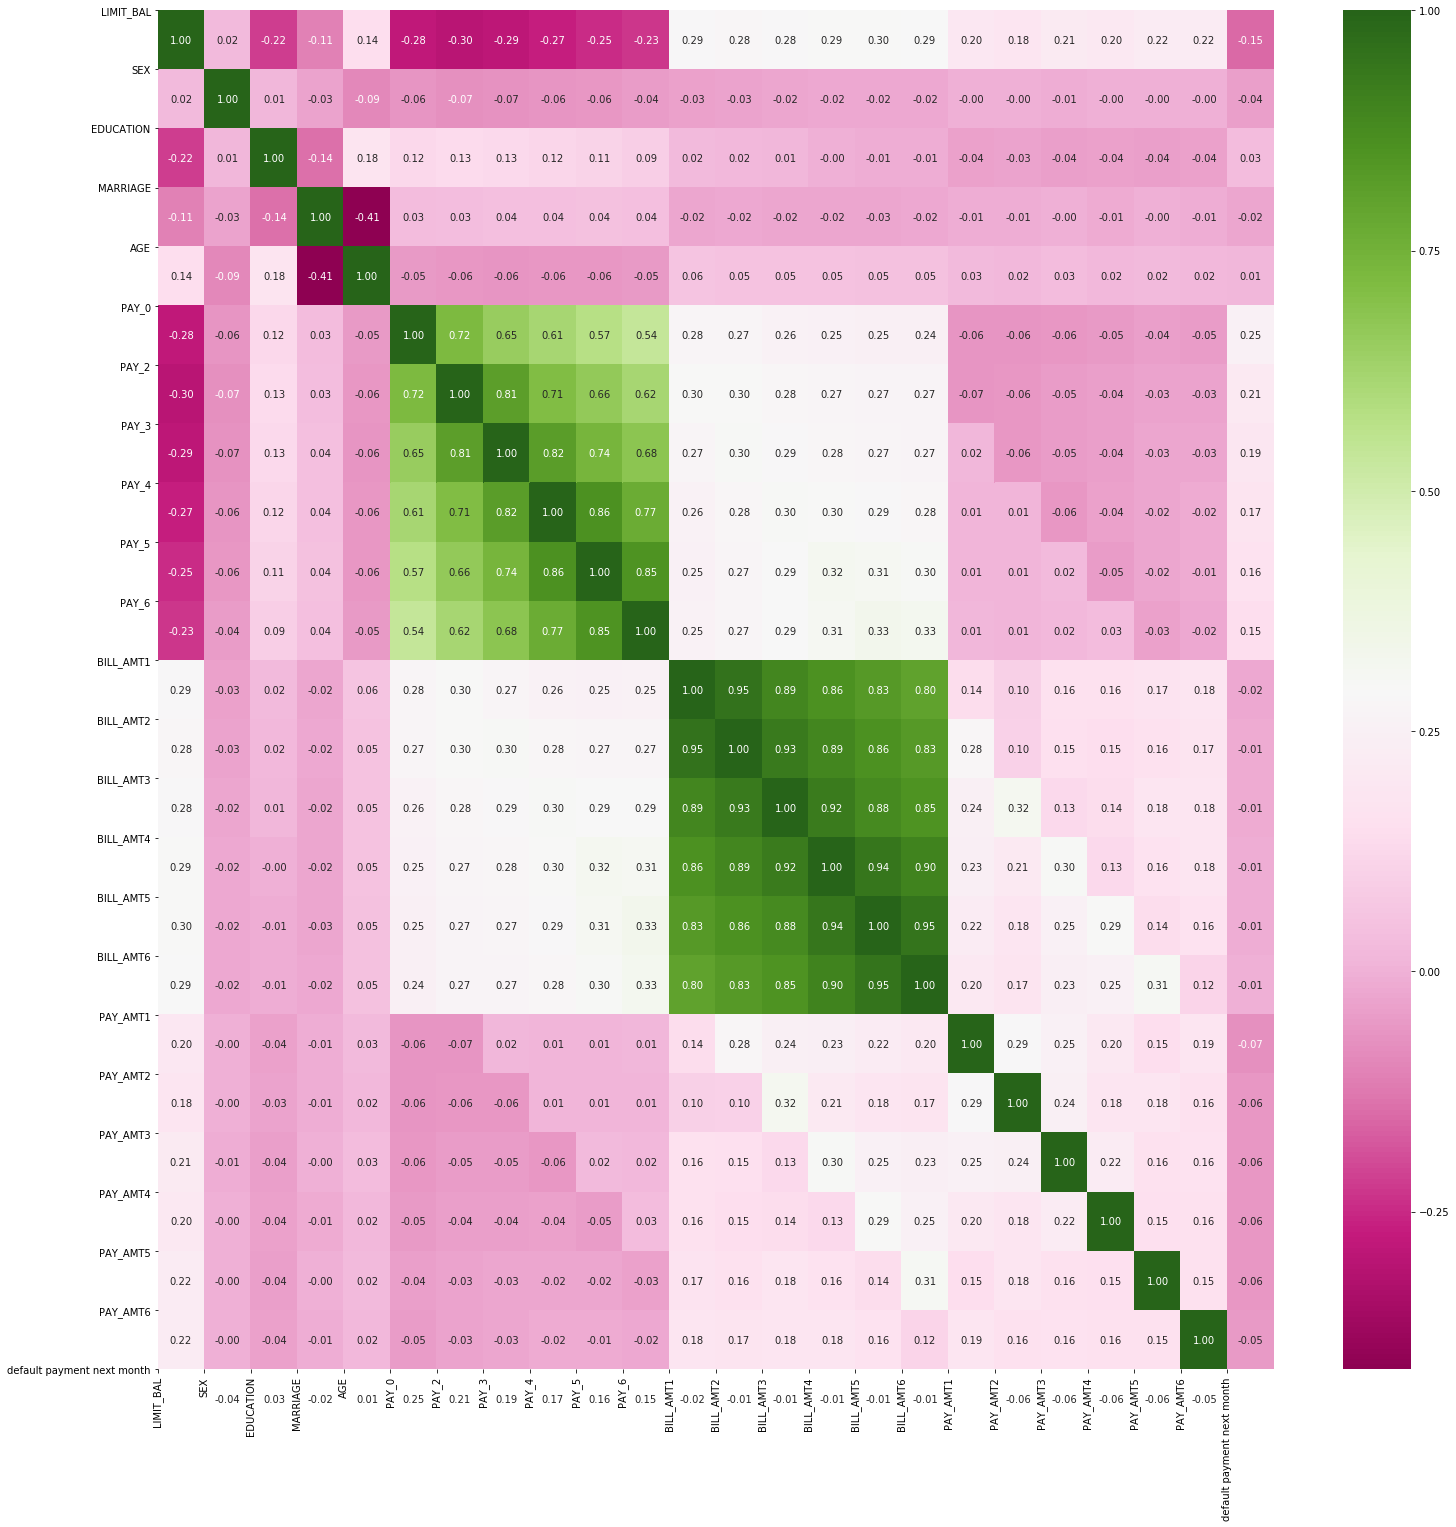

In [374]:
corr = df_move.corr()

fig, ax = plt.subplots(figsize=(25, 25))
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap='PiYG', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show();

In [437]:
# какой итог дефолтного состояния по 10-ке низших счетов
df_move.sort_values(['BILL_AMT1'
#                      , 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'
                    ], ascending=True).iloc[0:10].T

,12330,23003,8835,351,29779,27465,4635,4439,17204,3105
LIMIT_BAL,300000,250000,430000,200000,50000,110000,50000,240000,70000,350000
SEX,1,2,2,1,1,1,1,1,1,2
EDUCATION,2,1,2,1,2,2,3,2,2,2
MARRIAGE,1,1,1,1,1,1,2,1,2,1
AGE,37,32,32,36,32,50,28,44,29,33
PAY_0,1,1,-1,1,1,1,1,-1,-1,-1
PAY_2,0,0,-1,-1,-1,0,0,-1,-1,-1
PAY_3,2,1,0,0,0,1,0,-1,-1,0
PAY_4,1,1,2,0,0,1,1,0,-1,1
PAY_5,1,1,1,-1,0,1,0,1,-1,1


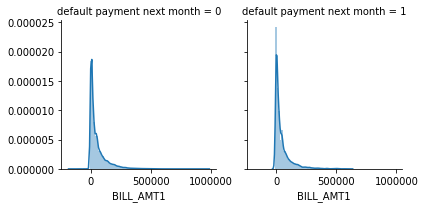

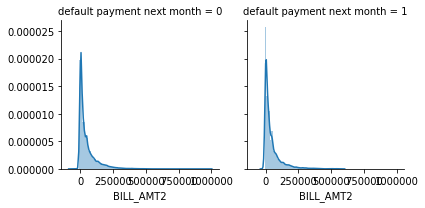

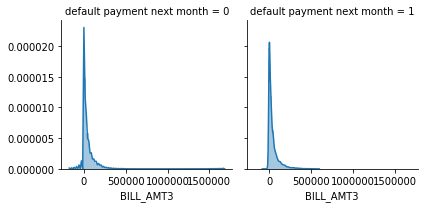

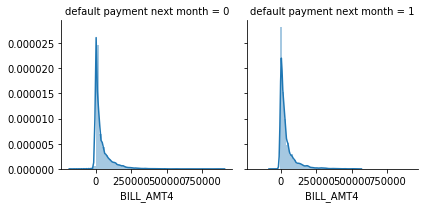

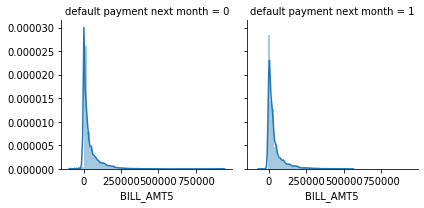

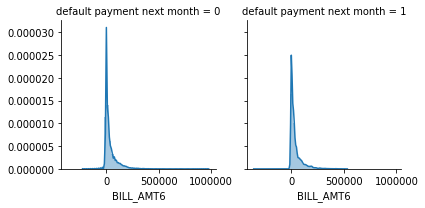

In [357]:
# какое распределение состояний счетов относительно дефолтных состояний
ffd = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for i in ffd:
    g = sns.FacetGrid(df_move, col='default payment next month')
    g.map(sns.distplot, i);

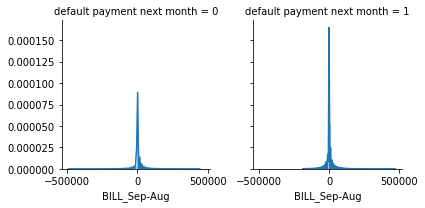

In [420]:
# прирост счетов за последний месяц
ffd = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

gg = df_move.drop(['BILL_AMT1','BILL_AMT2'], axis=1)
gg['BILL_Sep-Aug'] = df_move['BILL_AMT1'] - df_move['BILL_AMT2']

g = sns.FacetGrid(gg, col='default payment next month')
g.map(sns.distplot, 'BILL_Sep-Aug');

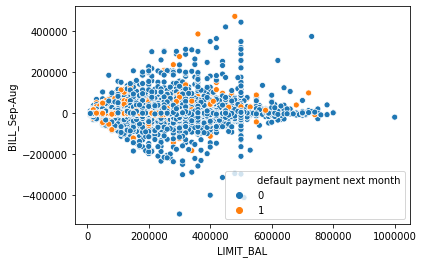

In [421]:
sns.scatterplot(x='LIMIT_BAL', y='BILL_Sep-Aug', data=gg, hue='default payment next month');

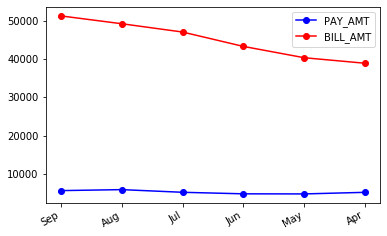

In [320]:
# смотрим среднее для определения стационарности ряда

data = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
data1 = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
months = ['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr']

f, ax = plt.subplots(1, 1)

ax.plot_date(x=months, y = data.mean().values, color="blue", label="PAY_AMT", linestyle="-")
ax.plot_date(x=months, y = data1.mean().values, color="red", label="BILL_AMT", linestyle="-")

ax.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [253]:
ff = df_move.BILL_AMT1 - df_move.BILL_AMT2
ff.describe()

count     30000.000000
mean       2044.255733
std       22684.893269
min     -489972.000000
25%       -1524.000000
50%           0.000000
75%        2252.250000
max      470400.000000
dtype: float64